In [1]:
from keras.preprocessing import image
import numpy as np
from pathlib import Path
import joblib

2022-09-05 09:40:02.572428: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-05 09:40:02.577500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

# Load data set


In [3]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/train.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)


,filepath,classification
0,A558691-12-31-1900-NA-CHEST_AP_VIEWONLY-55436-...,positive
1,MIDRC-RICORD-1C-419639-003029-68072-0.png,positive


In [4]:
df_data.groupby('classification').count()

,filepath
classification,
negative,3358
positive,3838


In [5]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [6]:
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [7]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA68A6096D0> 2
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA68A609850> 19
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD0AC0> 24
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD0B50> 27
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BD0CA0> 32
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BD0DF0> 37
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD09D0> 38
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD8070> 40
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD8130> 46
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BD81F0> 47
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD80A0> 49
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BD8370> 61

In [8]:
len(images)

7196

In [9]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([3358, 3838]))

In [10]:
# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)

In [11]:
x_train.shape

(7196, 224, 224, 3)

In [12]:
y_train.shape

(7196,)

In [13]:
# Normalize image data to 0-to-1 range
#x_train /= 255 use vgg16 preprocessing instead

#print(x_train[0], x_train.shape)

Load validation data

In [14]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/val.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A866354-12-30-1900-NA-CHEST_AP_VIEWONLY-21494-...,positive
1,A329601-12-31-1900-NA-CHEST_AP_PORTABLE-09571-...,positive


In [15]:
df_data.groupby('classification').count()

,filepath
classification,
negative,420
positive,480


In [16]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [17]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BED670>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE3250>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BE3D90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE39A0>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BE3A30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE3CA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE3100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE3310>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE3D60>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BE3F70>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689BE3D60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689BE34F0>
<PIL.JpegImagePlugin.JpegI

In [18]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [19]:
# Create a single numpy array with all the images we loaded
x_val = np.array(images)

# Also convert the labels to a numpy array
y_val = np.array(labels)

#x_val /= 255

print(x_val.shape, y_val.shape)

(900, 224, 224, 3) (900,)


Create VGG16 transfer learning model

In [20]:
from tensorflow.keras.applications import vgg16

In [21]:
# Normalize image data to 0-to-1 range
x_train = vgg16.preprocess_input(x_train)
# Normalize image data to 0-to-1 range
x_val = vgg16.preprocess_input(x_val)

In [22]:
# Load a pre-trained neural network to use as a feature extractor
pretrained_nn = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features for each image (all in one pass)
x_train = pretrained_nn.predict(x_train)

# Extract features for each image (all in one pass)
x_val = pretrained_nn.predict(x_val)

2022-09-05 09:41:00.834213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-cas/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Tcl/8.6.11-GCCcore-11.2.0/lib:/rds/b

29/29 [==============================] - 15s 504ms/step


In [23]:
# Find class weights
import numpy as np
c_pneumonia_count = np.count_nonzero(y_train == 1)
c_normal_count = np.count_nonzero(y_train == 0)
c_train_count = y_train.size
print(c_normal_count,c_pneumonia_count, c_train_count)

3358 3838 7196


In [24]:
weight_for_0 = (1 / c_normal_count)*(c_train_count)/2.0 
weight_for_1 = (1 / c_pneumonia_count)*(c_train_count)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.07
Weight for class 1: 0.94


In [25]:
#Reshape for SVC
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))

In [26]:

# Use SVM to classify
from sklearn.svm import SVC

In [27]:

from sklearn.model_selection import GridSearchCV
 #https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
# defining parameter range

param_grid = {'kernel':['poly'],'degree':[1,2,3]}
grid = GridSearchCV(SVC(class_weight=class_weight), param_grid, refit = True, cv=3, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............degree=1, kernel=poly;, score=0.965 total time= 2.3min
[CV 2/3] END .............degree=1, kernel=poly;, score=0.967 total time= 2.4min
[CV 3/3] END .............degree=1, kernel=poly;, score=0.976 total time= 2.4min
[CV 1/3] END .............degree=2, kernel=poly;, score=0.960 total time= 3.0min
[CV 2/3] END .............degree=2, kernel=poly;, score=0.965 total time= 3.1min
[CV 3/3] END .............degree=2, kernel=poly;, score=0.976 total time= 3.2min
[CV 1/3] END .............degree=3, kernel=poly;, score=0.945 total time= 4.0min
[CV 2/3] END .............degree=3, kernel=poly;, score=0.946 total time= 4.1min
[CV 3/3] END .............degree=3, kernel=poly;, score=0.954 total time= 4.2min


GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 1.0714711137581896,
                                         1: 0.9374674309536216}),
             param_grid={'degree': [1, 2, 3], 'kernel': ['poly']}, verbose=3)

In [46]:
print(grid.best_score_)

0.9690115066246557


In [47]:
print(grid.best_params_)

{'degree': 1, 'kernel': 'poly'}


In [28]:

# Use SVM to classify
from sklearn.svm import SVC
svm_classifier = SVC(kernel='poly', degree=1, class_weight=class_weight)
svm_classifier.fit(x_train, y_train)

SVC(class_weight={0: 1.0714711137581896, 1: 0.9374674309536216}, degree=1,
    kernel='poly')

In [29]:
#Hold out validation
val_pred = svm_classifier.predict(x_val)

#Process results
val_pred = val_pred.flatten()

# extract the predicted class labels
import numpy as np
val_pred = np.where(val_pred > 0.5, 1, 0)

In [30]:
#Holdout validation report
from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9687    0.9571    0.9629       420
           1     0.9629    0.9729    0.9679       480

    accuracy                         0.9656       900
   macro avg     0.9658    0.9650    0.9654       900
weighted avg     0.9656    0.9656    0.9655       900



# Load data set

In [31]:
# Load data set
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/test.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A652157-01-22-1901-NA-CHEST_AP_PORT-58283-5.00...,positive
1,38ccf1a4-071c-4243-86b5-3f7d5db8df5c.png,negative


In [32]:
df_data.groupby('classification').count()

,filepath
classification,
negative,420
positive,480


In [33]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [34]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689DB1430> 63
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689DB29A0> 86
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689DB2A30> 107
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689DB2A90> 121
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689DB2250> 127
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689DB2B20> 134
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA689DB2970> 228
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689677F70> 234
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689677E80> 240
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA689677C40> 258
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA6895F0C10> 266
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA6

In [35]:
len(images)

900

In [36]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [37]:
# Create a single numpy array with all the images we loaded
x_test = np.array(images)

# Also convert the labels to a numpy array
y_true = np.array(labels)

In [38]:
print(x_test.shape, y_true.shape)

(900, 224, 224, 3) (900,)


In [39]:
# Normalize image data to 0-to-1 range
x_test = vgg16.preprocess_input(x_test)
x_test.shape

# Extract features for each image (all in one pass)
x_test = pretrained_nn.predict(x_test)

29/29 [==============================] - 15s 515ms/step


In [40]:
x_test = x_test.reshape((x_test.shape[0], -1))

In [41]:
# Given the test images, make a final prediction using our own model
results = svm_classifier.predict(x_test)

#Process results
p_pred = results.flatten()

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

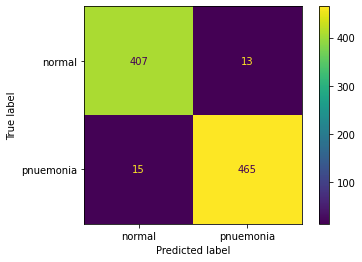

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['normal', 'pnuemonia']
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9645    0.9690    0.9667       420
           1     0.9728    0.9688    0.9708       480

    accuracy                         0.9689       900
   macro avg     0.9686    0.9689    0.9688       900
weighted avg     0.9689    0.9689    0.9689       900

